In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
srate = 128
time = np.arange(-1, 2, 1/srate)
pnts = len(time)
hz = np.linspace(0, srate/2, len(time)//2)

ed = 50
as_ = np.random.rand(1, pnts) * np.exp(-np.arange(pnts)/ed)

fc = as_ * np.exp(1j*2*np.pi*np.random.rand(as_.shape[1]))

noise = np.real(scipy.fft.ifft(fc.flatten())) * pnts  


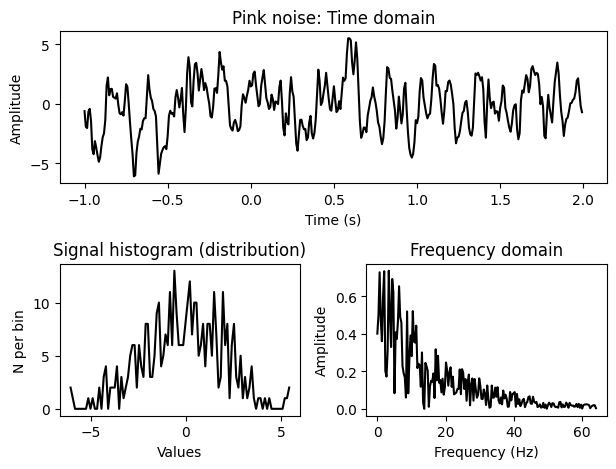

In [3]:
plt.subplot(211)
plt.plot(time, noise, "k")
plt.title("Pink noise: Time domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(223)
y, xx = np.histogram(noise, bins=100)
x = (xx[1:] + xx[:-1]) / 2
plt.plot(x, y, "k")
plt.title("Signal histogram (distribution)")
plt.xlabel("Values")
plt.ylabel("N per bin")

plt.subplot(224)
amp = abs(scipy.fft.fft(noise)/pnts)
amp[1:] = 2 * amp[1:]
plt.plot(hz, amp[1:len(hz)+1], "k")
plt.title("Frequency domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.tight_layout()
